# a synthesis figure

In this notebook, we designed a figure to accompagny our press release, boith in french and english:



## Une nouvelle étude analysant comment nous détectons un animal dans une scène visuelle permet de révéler certains mystères du cerveau.

Des scientifiques de l’université d'Aix-Marseille et de l’université d'Edinburgh en Ecosse ont modélisé la façon dont nous pouvons distinguer des animaux sur une image en une fraction de seconde. Ils ont alors trouvé que cette classification est possible à un niveau de représentation très primitif, et non, comme cela est généralement admis, après une longue série d'analyses visuelles de plus en plus abstraites (détection des yeux et des membres, puis de la tête et du corps, etc...).

Cette étude montre que quand des personnes regardent une image, leur cerveau se fait très rapidement une première idée de son contenu, en complément de processus de traitement de plus en plus raffinés et de plus en plus longs.

Ces chercheurs ont utilisé des données précédemment enregistrées dans lesquelles des volontaires regardaient et classifiaient des centaines d'images. Ils ont ensuite utilisé desmodèles mathématiques de la représentation visuelle des images dans l'aire visuelle primaire et en particulier des inter-relations entre des éléments de contours voisins. En utilisant cette représentation primitive, ils ont mis en évidence qu'un programme très simple pouvait facilement classifier les images comme contenant ou non un animal, sans avoir
besoin d’une connaissance plus élaborée sur les caractéristiques d’un animal comme sa position, sa taille ou son orientation sur l’image.

Cette découverte peut accélérer le développement de requêtes via des images dans les moteurs de recherche, comme Google et Facebook, car elle permet une classification simple etrobuste grâce à des caractéristiques statistiques de bas niveau basées la géométrie des objets et pourrait ainsi améliorer l'efficacité de tels algorithmes.

Cette étude a été financée grâce à des aides de la communauté européenne et de l'Agence Nationale pour la Recherche Française et est publiée dans le journal Scientific Reports du groupe Nature Publishing.

Selon Laurent Perrinet, chercheur à l'institut des neurosciences de la Timone, qui a conduit cette étude en collaboration avec James Bednar de l'université d'Edinburgh : "Les résultats de cette étude ont des applications directes pour la classification des images mais aussi des conséquences inattendues sur notre compréhension des mécanismes visuels. En effet, ils montrent qu'en un clin d'œil, nous sommes capables d'extraire une première impression de la scène en exploitant des régularités statistiques simples avant de procéder à une analyse plus complexe de la scène. Plus surprenant encore, nous avons mis en évidence que quand les humains se trompent en classifiant de manière erronée une image comme contenant un animal, alors le modèle que nous avons construit se trompe de la même façon!"


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd -q ../test/
import os
home = os.environ['HOME']

In [3]:
import matplotlib
matplotlib.use("Agg") # agg-backend, so we can create figures without x-server (no PDF, just PNG etc.)
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'text.usetex': True})
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

## one tiger of an image

The image was imported in the database notebook.

In [4]:
%%writefile experiment_yelmo.py

import numpy as np
from SparseEdges import SparseEdges

#ef = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp = SparseEdges('../notebooks/srep_param.py')

mp.pe.figpath = '../figures'
mp.pe.N = 2048
mp.pe.MP_alpha = .9

# defining input image
#image = mp.imread('https://raw.githubusercontent.com/bicv/SparseEdges/master/database/yelmo256.png')
image = mp.imread('../database/6370387703_5e718ea681_q_d.jpg')
mp.set_size(image)

mp.init()
white = mp.pipeline(image, do_whitening=True)


name = 'MPtutorial'
import os
matname = os.path.join(mp.pe.matpath, name + '.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(white, verbose=True)
    np.save(matname, edges)    

fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
mp.pe.figsize_edges = 9 #.382 * fig_width
mp.pe.line_width = 3.
mp.pe.scale = .5


fig, a = mp.show_edges(edges, image=mp.dewhitening(white), show_phase=False, show_mask=True)
mp.savefig(fig, name, figpath=None)

image_rec = mp.reconstruct(edges, do_mask=True)        
fig, a = mp.show_edges(edges, image=mp.dewhitening(image_rec), show_phase=False, show_mask=True)
mp.savefig(fig, name + '_rec', figpath=None)


Overwriting experiment_yelmo.py


In [5]:
%run experiment_yelmo.py

## chevron plot animal vs non-animal (french)

Run the ``3 notebook_figure_chevrons`` notebook before:

In [6]:
%run experiment_hists.py

 figure : chevron map 


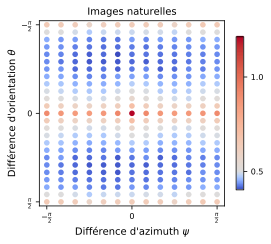

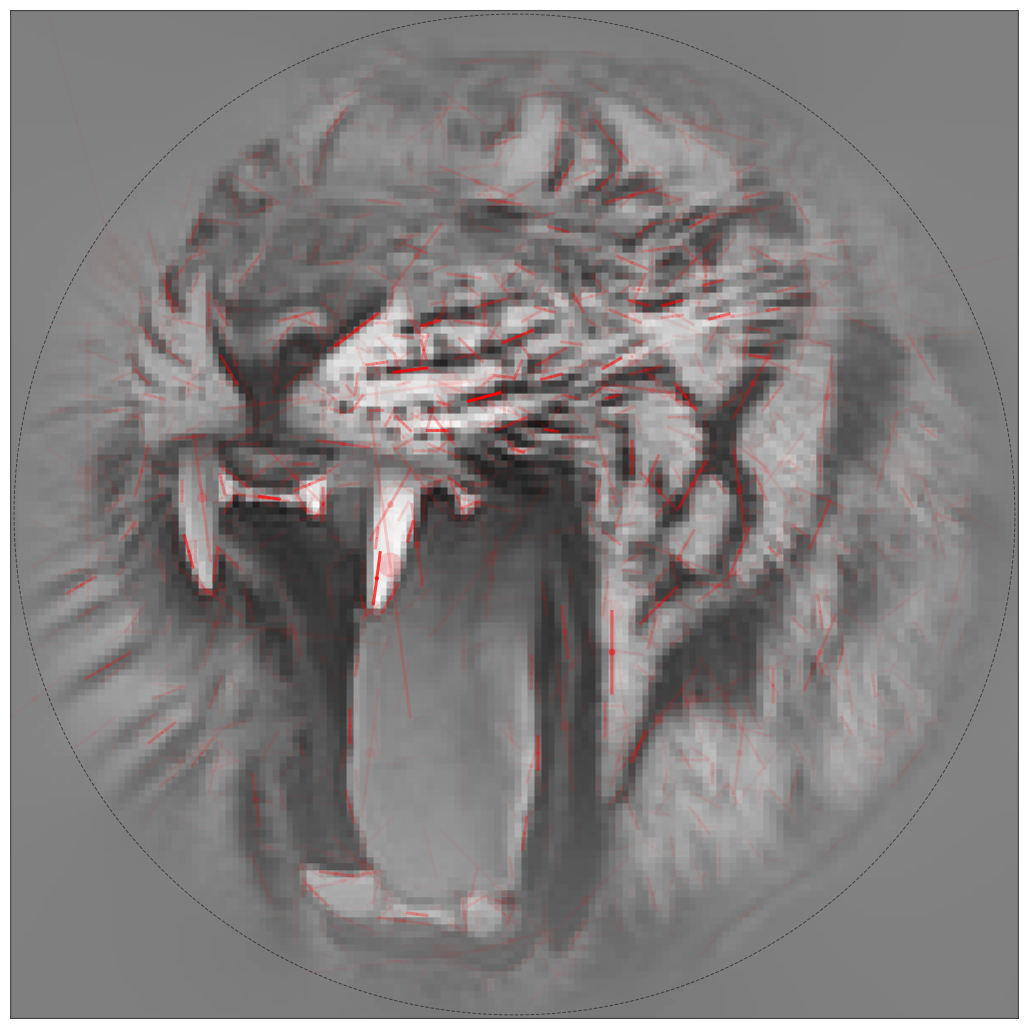

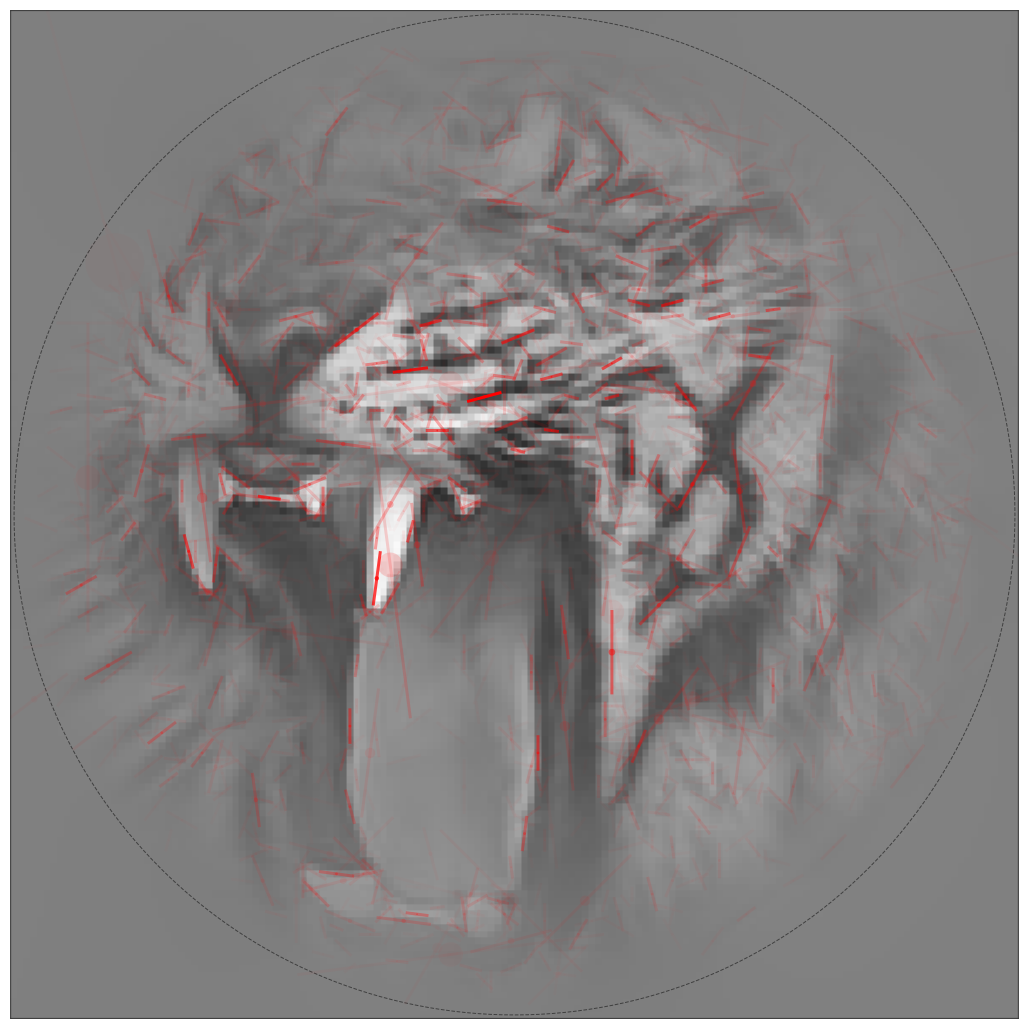

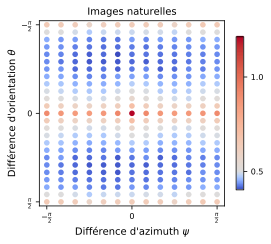

In [7]:
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width_pt = 265. # Get this from LaTeX using \showthe\columnwidth
fig_width = fig_width_pt*inches_per_pt  # width in inches

ef.pe.figpath = '../figures'


figsize3 = (fig_width, fig_width)

print(' figure : chevron map ')
dolog = False
dolog = True
half = True
half = False
labels = False
labels = True
fig = plt.figure(figsize=figsize3)
border = 0.03

#              *left*, *bottom*, *width*, *height*
compare = False
ax = fig.add_axes((border*5, border, 1.-border*4, 1.-border), facecolor='w')
xticks=True
ax.axis(c='b', lw=0)
#     v_max, v_min = 2., -1.
v_max, v_min = None, None
if compare:
    v_hist_angle = v_hist2.sum(axis=(0, 3)).mean(axis=-1) / v_hist1.sum(axis=(0, 3)).mean(axis=-1) # -d-, phi, theta, -scale-
    print (' Figure 3 : maximum of animal vs non-animal map is ', v_hist_angle.max()/v_hist_angle.mean(), ' minimum is ', v_hist_angle.min()/v_hist_angle.mean())
    v_max, v_min = .19, -1.
    fig, ax = ef.cohistedges(edgeslist=None, v_hist=v_hist2.mean(axis=-1), prior=v_hist1.mean(axis=-1), v_min=v_min, v_max=v_max,
                        fig=fig, ax=ax, display='chevrons', dolog=dolog, labels=labels, xticks=xticks, half=half, cbar_label=False)
else:
    fig, ax = ef.cohistedges(edgeslist=None, v_hist=v_hist1.mean(axis=-1), v_min=v_min, v_max=v_max,
                        fig=fig, ax=ax, display='chevrons', dolog=dolog, labels=labels, xticks=xticks, half=half, cbar_label=False)

# FRENCH
if compare: 
    _ = ax.set_title(r'Catégorie animal par rapport \`a non-animal', fontsize=10)
else:
    _ = ax.set_title(r'Images naturelles', fontsize=10)
_ = ax.set_xlabel(r"Différence d'azimuth $\psi$", fontsize=10)
_ = ax.set_ylabel(r"Différence d'orientation $\theta$", fontsize=10)
ef.savefig(fig, 'figure_chevrons_animals_FR', figpath=None)

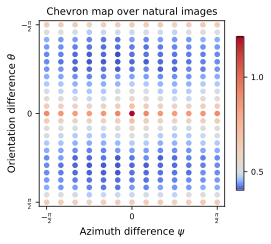

In [8]:
if compare: _ = ax.set_title(r'Animal versus non-animal images', fontsize=10)
else:
    _ = ax.set_title(r'Chevron map over natural images', fontsize=10)
_ = ax.set_xlabel(r"Azimuth difference $\psi$", fontsize=10)
_ = ax.set_ylabel(r"Orientation difference $\theta$", fontsize=10)

ef.savefig(fig, 'figure_chevrons_animals', figpath=None)

## Montage of the 2 subplots

In [9]:
import tikzmagic

In [10]:
%load_ext tikzmagic

In [11]:
%cp ../figures/MPtutorial_rec.pdf ../figures/diagram.pdf  ../figures/figure_chevrons_animals.pdf ../figures/figure_chevrons_animals_FR.pdf /tmp

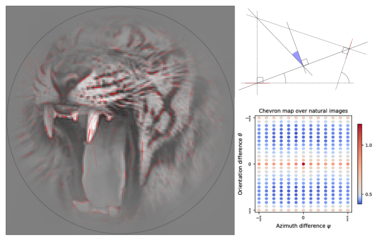

In [12]:
%%tikz 


\draw [anchor=north west] (0, 5) node {\includegraphics[width=5cm]{/tmp/MPtutorial_rec.pdf}};
\draw [anchor=north west] (5, 5) node {\includegraphics[width=3cm]{/tmp/diagram.pdf}};
\draw [anchor=north west] (5, 3) node {\includegraphics[width=3cm]{/tmp/figure_chevrons_animals.pdf}};


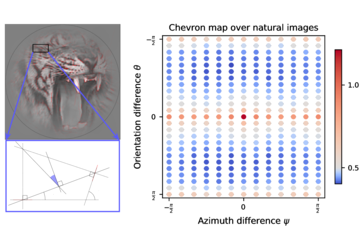

In [13]:
%%tikz -l arrows.meta -S ../figures/figure_synthesis.pdf

\draw [anchor=north west] (0, 5) node {\reflectbox{\includegraphics[width=3cm]{/tmp/MPtutorial_rec.pdf}}};

\draw (.85, 4.15) rectangle (1.25, 4.35);

\draw [anchor=north west] (0, 2) node {\includegraphics[width=2.8cm]{/tmp/diagram.pdf}};

\draw [-{Stealth[length=2mm]}, thick, blue!65] (.85, 4.15) --  (0.15, 1.85);
\draw [-{Stealth[length=2mm]}, thick, blue!65] (1.25, 4.15) --  (3.1, 1.85);
\draw [thick, blue!65] (0.15, 0) rectangle (3.1, 1.85);


\draw [anchor=north west] (3.2, 5.5) node {\includegraphics[width=6cm]{/tmp/figure_chevrons_animals.pdf}};


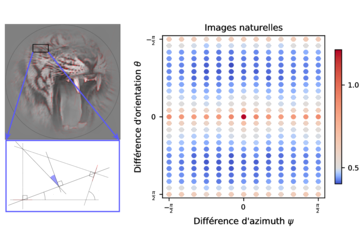

In [14]:
%%tikz -l arrows.meta -S ../figures/figure_synthesis_FR.pdf

\draw [anchor=north west] (0, 5) node {\reflectbox{\includegraphics[width=3cm]{/tmp/MPtutorial_rec.pdf}}};

\draw (.85, 4.15) rectangle (1.25, 4.35);

\draw [anchor=north west] (0, 2) node {\includegraphics[width=2.8cm]{/tmp/diagram.pdf}};

\draw [-{Stealth[length=2mm]}, thick, blue!65] (.85, 4.15) --  (0.15, 1.85);
\draw [-{Stealth[length=2mm]}, thick, blue!65] (1.25, 4.15) --  (3.1, 1.85);
\draw [thick, blue!65] (0.15, 0) rectangle (3.1, 1.85);


\draw [anchor=north west] (3.2, 5.5) node {\includegraphics[width=6cm]{/tmp/figure_chevrons_animals_FR.pdf}};


À partir d'une image naturelle (en haut à gauche), les auteurs de cette étude ont déterminé la façon la plus efficace de la réprésenter comme une succession de contours élémentaires orientés. Sur cette exemple, l'image est déomposée en contours élémentaires (marqués en rouge) et l'image correspond à sa reconstruction à partir de cette représentation, gage d'un représentation correcte de l'image. Le schéma (en bas à gauche) décrit alors les relations géométriques pour chaque paire de contours élémentaires (dénotés ici A et B) et en particulier la différence entre leurs orientations (cette différence est nulle pour des contours parallèles) ainsi que leur différence d'azimuth. Une valeur nulle de cette dernière indiquant une symétrie, c'est-à-dire que ces contours sont co-circulaires. On peut alors compiler les statistiques des différentes configurations possibles sur des bases de données de 600 images contenant et 600 ne contenant pas d'animal. On voit alors que les images contenant un animal présentent relativement moins de configurations parallèles (disques bleus, jusqu'à 50% de moins) et plus de configurations co-circulaires, c'est à dire le long de l'axe vertical médian (disques rouges, jusqu'à 20% d'occurences en plus). Cette différence, aussi tenue soit elle permet alors de classifier une image pour permettre de deviner si elle contient ou non un animal. 

In [15]:
!convert -density 600 ../figures/figure_synthesis.pdf  ../figures/figure_synthesis.png
!convert -density 600 ../figures/figure_synthesis_FR.pdf  ../figures/figure_synthesis_FR.png

## version control

In [16]:
!git status

On branch master
Your branch is ahead of 'origin/master' by 4 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   ../figures/MPtutorial.jpg
	modified:   ../figures/MPtutorial.pdf
	modified:   ../figures/MPtutorial.png
	modified:   ../figures/MPtutorial_rec.jpg
	modified:   ../figures/MPtutorial_rec.pdf
	modified:   ../figures/MPtutorial_rec.png
	modified:   ../figures/diagram.pdf
	modified:   ../figures/figure_chevrons_animals.jpg
	modified:   ../figures/figure_chevrons_animals.pdf
	modified:   ../figures/figure_chevrons_animals.png
	modified:   ../figures/figure_chevrons_animals_FR.jpg
	modified:   ../figures/figure_chevrons_animals_FR.pdf
	modified:   ../figures/figure_chevrons_animals_FR.png
	modified:   ../figures/figure_synthesis.pdf
	modified:   ../figures/figure_synthesis.png
	modified:   ../f

In [17]:
#!git add ../figures/figure_synthesis* ../figures/figure_chevrons_animals* ../database/6370387703_5e718ea681_q_d.jpg

In [18]:
!git commit -m' re-launching notebooks : figure synthesis' ../notebooks/2\ notebook_figure_synthesis.ipynb ../figures/figure_synthesis* 
#! git push

[master 98e28f3]  re-launching notebooks : figure synthesis
 5 files changed, 508 insertions(+), 2657 deletions(-)
 rewrite figures/figure_synthesis.pdf (94%)
 rewrite figures/figure_synthesis.png (94%)
 rewrite figures/figure_synthesis_FR.pdf (94%)
 rewrite figures/figure_synthesis_FR.png (95%)
 rewrite notebooks/2 notebook_figure_synthesis.ipynb (92%)
